# Task 1: Predictive Modeling

### Build a regression model to predict the aggregate rating of a restaurant based on available features

In [45]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [46]:
df = pd.read_csv('Dataset .csv')

In [47]:
df.head(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270


In [48]:
df['Cuisines'].fillna('Unknown', inplace=True)

In [49]:
df['Country Code'] = df['Country Code'].astype('category')
df['Has Table booking'] = df['Has Table booking'].map({'Yes': True, 'No': False})
df['Has Online delivery'] = df['Has Online delivery'].map({'Yes': True, 'No': False})
df['Is delivering now'] = df['Is delivering now'].map({'Yes': True, 'No': False})
df['Switch to order menu'] = df['Switch to order menu'].map({'Yes': True, 'No':False })
df['Currency'] = df['Currency'].astype('category')
df['Rating color'] = df['Rating color'].astype('category')
df['Rating text'] = df['Rating text'].astype('category')
df['Price range'] = df['Price range'].astype('category')

In [50]:
df['Restaurant Name Length'] = df['Restaurant Name'].apply(lambda x: len(x))
df['Address Length'] = df['Address'].apply(lambda x: len(x))

In [51]:
df.drop(columns=['Switch to order menu'],inplace=True)

In [52]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Price range',
       'Aggregate rating', 'Rating color', 'Rating text', 'Votes',
       'Restaurant Name Length', 'Address Length'],
      dtype='object')

In [53]:
df.corr(numeric_only=True)

,Restaurant ID,Longitude,Latitude,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Aggregate rating,Votes,Restaurant Name Length,Address Length
Restaurant ID,1.000000,-0.226081,-0.052081,-0.001693,-0.110071,-0.085089,0.012548,-0.326212,-0.147023,-0.029846,-0.094689
Longitude,-0.226081,1.000000,0.043207,0.045891,0.100488,0.178757,0.018787,-0.116818,-0.085101,-0.071168,0.158520
Latitude,-0.052081,0.043207,1.000000,-0.111088,0.054658,0.118722,0.015001,0.000516,-0.022962,0.040970,-0.049913
Average Cost for two,-0.001693,0.045891,-0.111088,1.000000,0.007758,-0.018974,-0.001862,0.051792,0.067783,-0.004188,-0.001374
Has Table booking,-0.110071,0.100488,0.054658,0.007758,1.000000,0.101224,-0.016816,0.189998,0.169422,0.075672,0.064177
Has Online delivery,-0.085089,0.178757,0.118722,-0.018974,0.101224,1.000000,0.101730,0.225699,0.074303,-0.159614,-0.018362
Is delivering now,0.012548,0.018787,0.015001,-0.001862,-0.016816,0.101730,1.000000,0.019180,-0.001124,-0.000149,-0.060606
Aggregate rating,-0.326212,-0.116818,0.000516,0.051792,0.189998,0.225699,0.019180,1.000000,0.313691,-0.035178,0.002334
Votes,-0.147023,-0.085101,-0.022962,0.067783,0.169422,0.074303,-0.001124,0.313691,1.000000,-0.018978,0.008844
Restaurant Name Length,-0.029846,-0.071168,0.040970,-0.004188,0.075672,-0.159614,-0.000149,-0.035178,-0.018978,1.000000,0.009567


In [54]:
df.duplicated().sum()

0

In [55]:
df.isnull().sum()

Restaurant ID             0
Restaurant Name           0
Country Code              0
City                      0
Address                   0
Locality                  0
Locality Verbose          0
Longitude                 0
Latitude                  0
Cuisines                  0
Average Cost for two      0
Currency                  0
Has Table booking         0
Has Online delivery       0
Is delivering now         0
Price range               0
Aggregate rating          0
Rating color              0
Rating text               0
Votes                     0
Restaurant Name Length    0
Address Length            0
dtype: int64

In [56]:
df.isna().sum()

Restaurant ID             0
Restaurant Name           0
Country Code              0
City                      0
Address                   0
Locality                  0
Locality Verbose          0
Longitude                 0
Latitude                  0
Cuisines                  0
Average Cost for two      0
Currency                  0
Has Table booking         0
Has Online delivery       0
Is delivering now         0
Price range               0
Aggregate rating          0
Rating color              0
Rating text               0
Votes                     0
Restaurant Name Length    0
Address Length            0
dtype: int64

In [57]:
df.dtypes

Restaurant ID                int64
Restaurant Name             object
Country Code              category
City                        object
Address                     object
Locality                    object
Locality Verbose            object
Longitude                  float64
Latitude                   float64
Cuisines                    object
Average Cost for two         int64
Currency                  category
Has Table booking             bool
Has Online delivery           bool
Is delivering now             bool
Price range               category
Aggregate rating           float64
Rating color              category
Rating text               category
Votes                        int64
Restaurant Name Length       int64
Address Length               int64
dtype: object

In [58]:
df['Price range'].value_counts()

Price range
1    4444
2    3113
3    1408
4     586
Name: count, dtype: int64

### Split the dataset into training and testing sets and evaluate the model's performance using appropriate metrics.

In [59]:
# Select features and target variable
X = df.drop(['Restaurant ID', 'Restaurant Name', 'Aggregate rating'], axis=1)
y = df['Aggregate rating']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [60]:
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns

In [61]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

### Experiment with different algorithms (e.g.,linear regression, decision trees, randomforest) and compare their performance.

In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import make_pipeline

In [63]:
model = make_pipeline(preprocessor, LinearRegression())

In [66]:
model.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Longitude', 'Latitude', 'Average Cost for two', 'Votes',
       'Restaurant Name Length', 'Address Length'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Country Code', 'City', 'Address', 'Locality', 'Locality Verbose',
       'Cuisines', 'Currency', 'Price range', 'Rating color', 'Rating text'],
      dtype='object'))])),
                ('linearregression', LinearRegression())])

In [67]:
y_pred = model.predict(X_test)

In [69]:
print("Linear Regression: ")
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

Linear Regression: 
Mean Squared Error (MSE): 0.25668479386897763
R^2 Score: 0.887226492684748


In [74]:
model1 = make_pipeline(preprocessor, DecisionTreeRegressor(random_state=42))

In [75]:
model1.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Longitude', 'Latitude', 'Average Cost for two', 'Votes',
       'Restaurant Name Length', 'Address Length'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Country Code', 'City', 'Address', 'Locality', 'Locality Verbose',
       'Cuisines', 'Currency', 'Price range', 'Rating color', 'Rating text'],
      dtype='object'))])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [77]:
y_pred = model1.predict(X_test)

In [79]:
print("DecisionTreeRegressor: ")
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

DecisionTreeRegressor: 
Mean Squared Error (MSE): 0.05553636839351125
R^2 Score: 0.9756003035751113


In [82]:
model2 = make_pipeline(preprocessor, RandomForestRegressor(random_state=42))

In [83]:
model2.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Longitude', 'Latitude', 'Average Cost for two', 'Votes',
       'Restaurant Name Length', 'Address Length'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Country Code', 'City', 'Address', 'Locality', 'Locality Verbose',
       'Cuisines', 'Currency', 'Price range', 'Rating color', 'Rating text'],
      dtype='object'))])),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [84]:
y_pred = model2.predict(X_test)

In [85]:
print("RandomForest Regressor: ")
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

RandomForest Regressor: 
Mean Squared Error (MSE): 0.03040309262166401
R^2 Score: 0.9866425145934993


# Task 2: Customer Preference Analysis

### Analyze the relationship between the type ofcuisine and the restaurant's rating.

In [86]:
from scipy.stats import f_oneway

ANOVA F-Statistic: 2.0596134232410694
P-value: 1.4400770752243935e-98


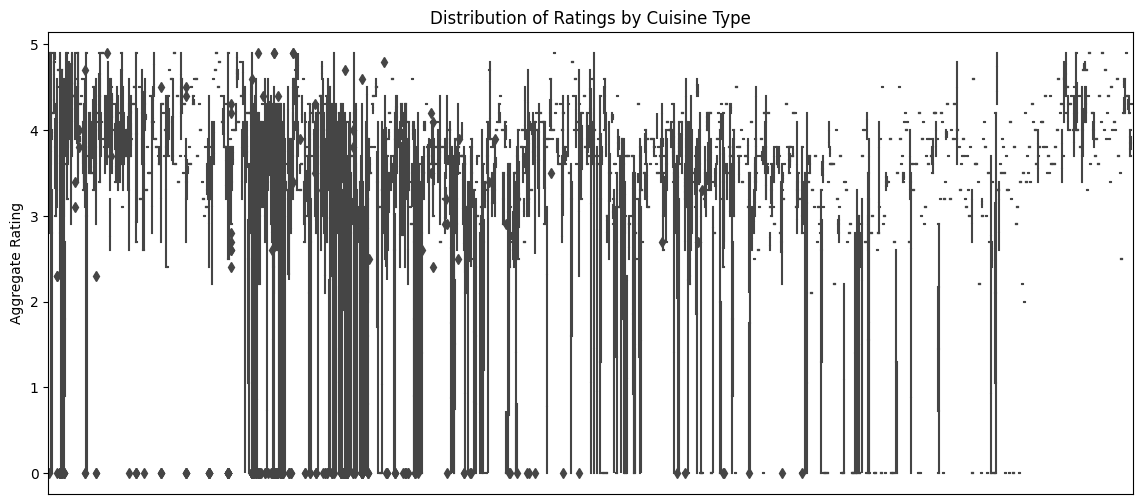

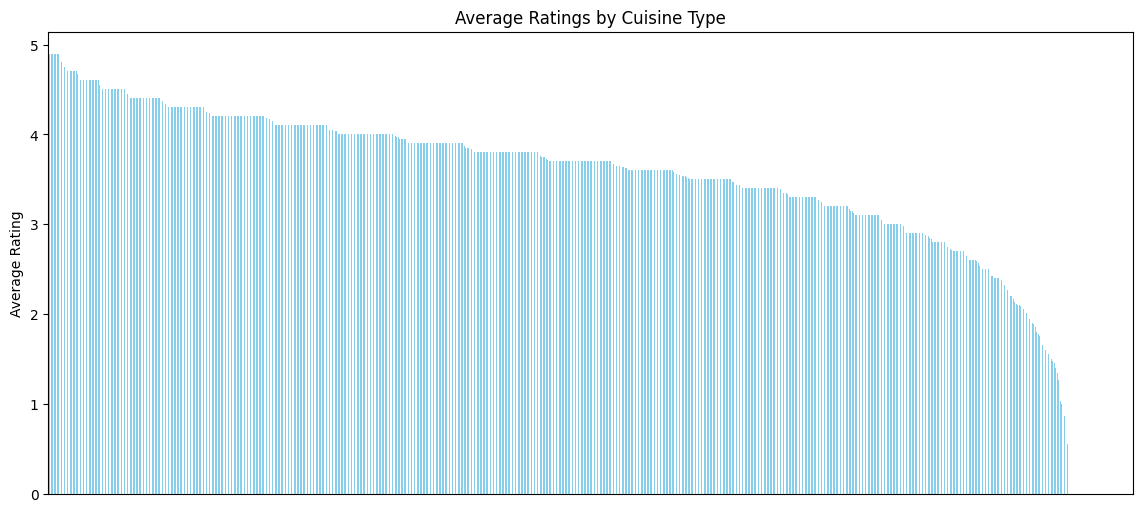

In [90]:
# Statistical Analysis (ANOVA)
cuisine_groups = [df[df['Cuisines'] == cuisine]['Aggregate rating'] for cuisine in df['Cuisines'].unique()]
f_statistic, p_value = f_oneway(*cuisine_groups)
print("ANOVA F-Statistic:", f_statistic)
print("P-value:", p_value)



plt.figure(figsize=(14, 6))  

# Box Plot
sns.boxplot(x='Cuisines', y='Aggregate rating', data=df)
plt.xticks([]) 
plt.title('Distribution of Ratings by Cuisine Type')
plt.xlabel('') 
plt.ylabel('Aggregate Rating')
plt.show()

# Bar Chart
plt.figure(figsize=(14, 6)) 
avg_ratings = df.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False)
avg_ratings.plot(kind='bar', color='skyblue')
plt.xticks([])  
plt.title('Average Ratings by Cuisine Type')
plt.xlabel('')
plt.ylabel('Average Rating')
plt.show()


In [91]:
print('''This result indicates that there is a statistically
significant difference in the ratings among different cuisine types.
The low p-value (much smaller than the commonly used significance level of 0.05)
suggests strong evidence against the null hypot''')

This result indicates that there is a statistically
significant difference in the ratings among different cuisine types.
The low p-value (much smaller than the commonly used significance level of 0.05)
suggests strong evidence against the null hypot


### Identify the most popular cuisines amongcustomers based on the number of votes

Top Cuisines Based on Number of Votes:
                            Cuisines  Votes
1514           North Indian, Mughlai  53747
1306                    North Indian  46241
1329           North Indian, Chinese  42012
331                             Cafe  30657
497                          Chinese  21925
1520  North Indian, Mughlai, Chinese  20115
828                        Fast Food  17852
1699                    South Indian  16433
1288           Mughlai, North Indian  15275
1031                         Italian  14799


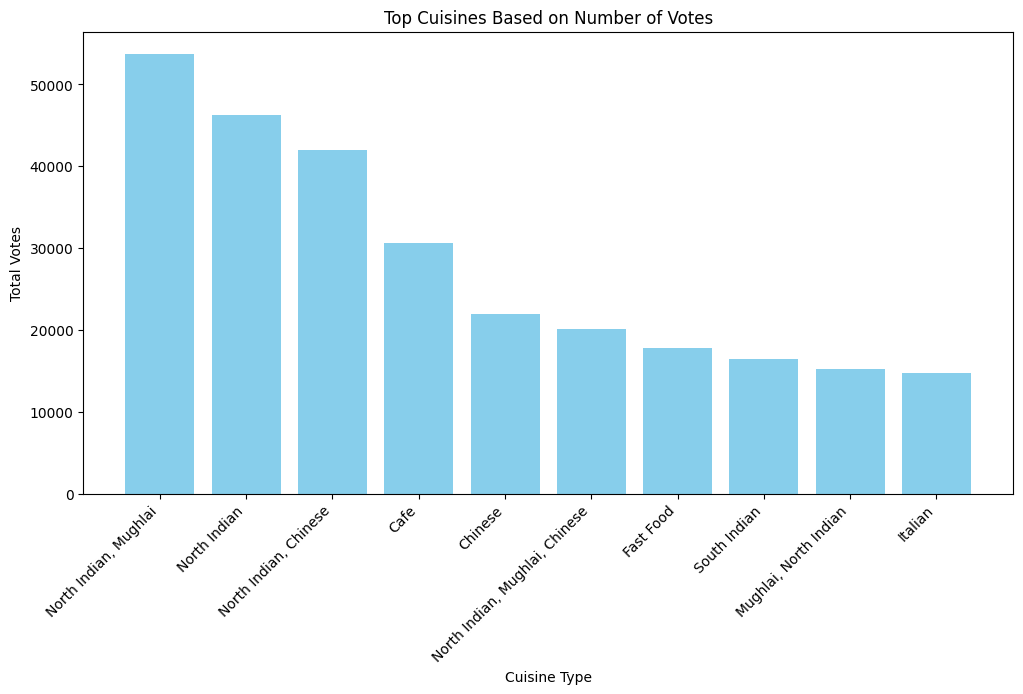

In [92]:
# Group the data by cuisine type and calculate the total number of votes for each cuisine
popular_cuisines = df.groupby('Cuisines')['Votes'].sum().reset_index()

# Sort the cuisines based on the total number of votes in descending order
popular_cuisines = popular_cuisines.sort_values(by='Votes', ascending=False)

# Display the top cuisines
print("Top Cuisines Based on Number of Votes:")
print(popular_cuisines.head(10))  # Display the top 10 cuisines

# Visualize the top cuisines (optional)
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(popular_cuisines['Cuisines'][:10], popular_cuisines['Votes'][:10], color='skyblue')
plt.title('Top Cuisines Based on Number of Votes')
plt.xlabel('Cuisine Type')
plt.ylabel('Total Votes')
plt.xticks(rotation=45, ha='right')
plt.show()

### Determine if there are any specific cuisines that tend to receive higher ratings.

Cuisines with Highest Average Ratings:
                          Cuisines  Aggregate rating
683            Continental, Indian               4.9
169       BBQ, Breakfast, Southern               4.9
1062                 Italian, Deli               4.9
37    American, Caribbean, Seafood               4.9
302        Burger, Bar Food, Steak               4.9
33         American, Burger, Grill               4.9
1034  Italian, Bakery, Continental               4.9
796        European, Asian, Indian               4.9
803         European, Contemporary               4.9
41        American, Coffee and Tea               4.9


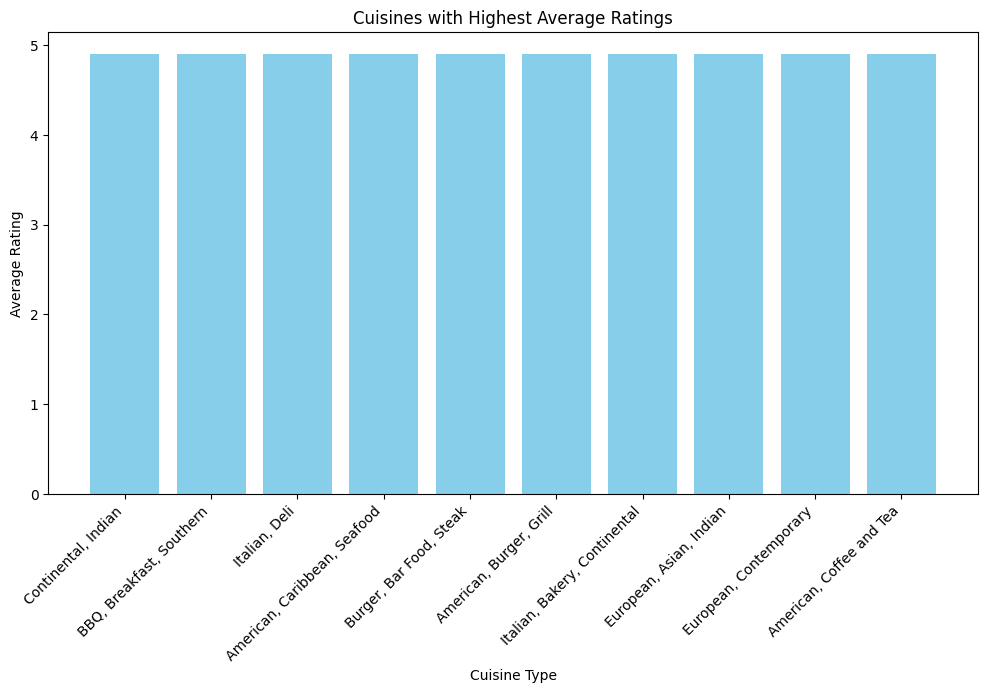

In [93]:
# Group the data by cuisine type and calculate the average rating for each cuisine
avg_ratings = df.groupby('Cuisines')['Aggregate rating'].mean().reset_index()

# Sort the cuisines based on the average rating in descending order
avg_ratings = avg_ratings.sort_values(by='Aggregate rating', ascending=False)

# Display the top cuisines with highest average ratings
print("Cuisines with Highest Average Ratings:")
print(avg_ratings.head(10))  # Display the top 10 cuisines

# Visualize the average ratings for cuisines (optional)
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(avg_ratings['Cuisines'][:10], avg_ratings['Aggregate rating'][:10], color='skyblue')
plt.title('Cuisines with Highest Average Ratings')
plt.xlabel('Cuisine Type')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.show()

# Task 3: Data Visualization

### Create visualizations to represent the distribution of ratings using different charts (histogram, barplot, etc.).

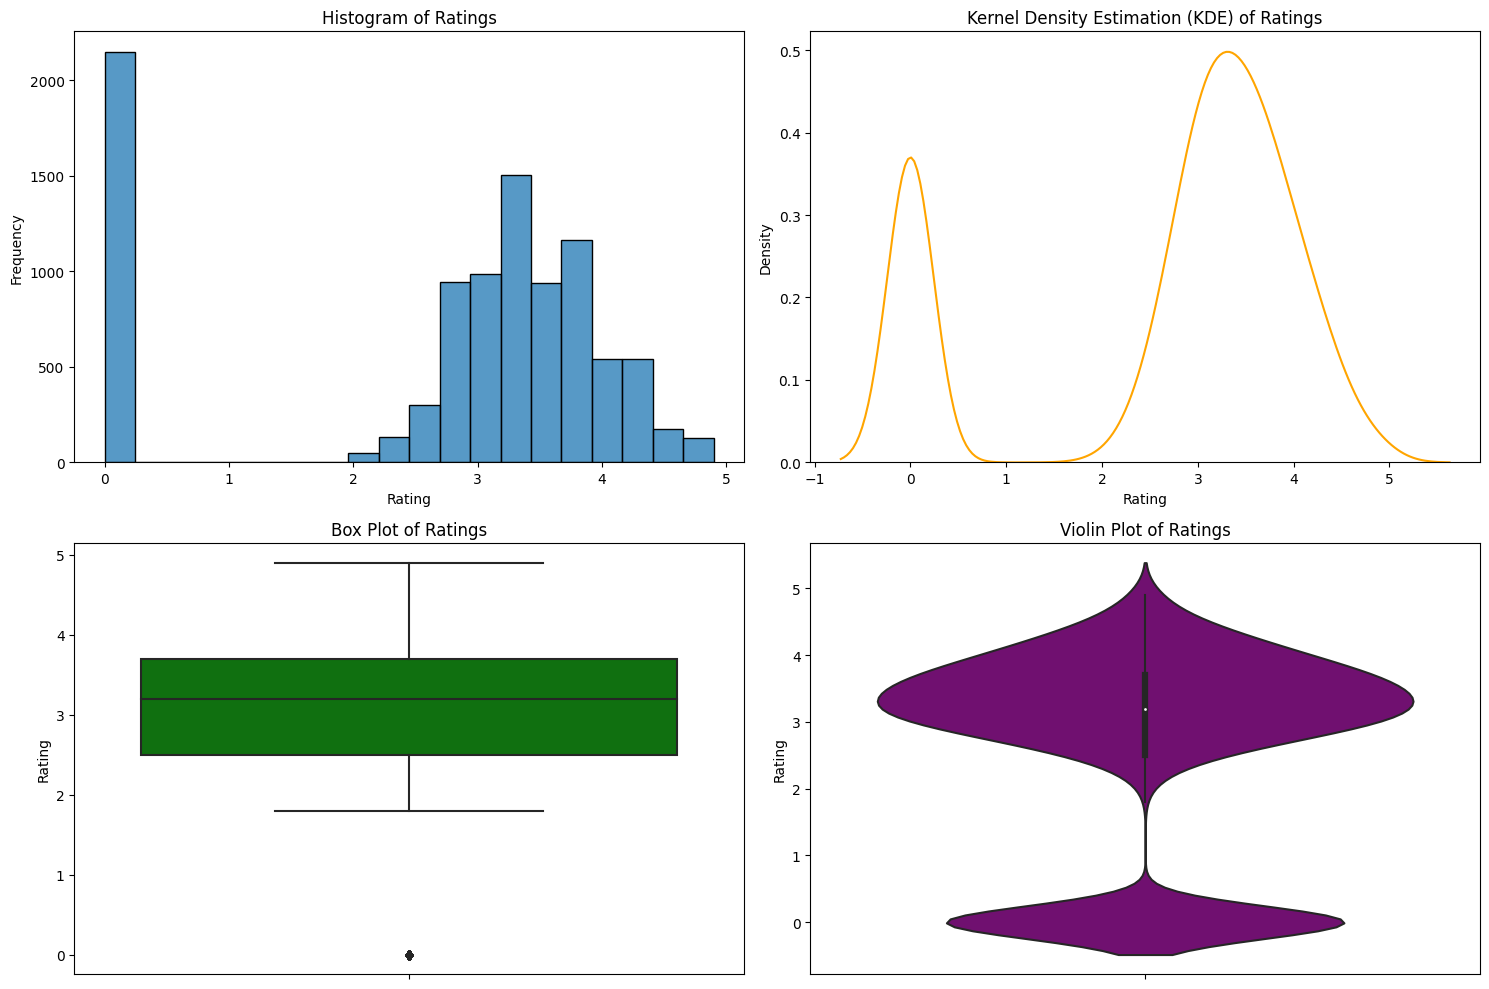

In [99]:
# Set up the figure and axes
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Histogram
sns.histplot(df['Aggregate rating'], bins=20, ax=axes[0, 0])
axes[0, 0].set_title('Histogram of Ratings')
axes[0, 0].set_xlabel('Rating')
axes[0, 0].set_ylabel('Frequency')

# KDE Plot
sns.kdeplot(df['Aggregate rating'], ax=axes[0, 1], color='orange')
axes[0, 1].set_title('Kernel Density Estimation (KDE) of Ratings')
axes[0, 1].set_xlabel('Rating')
axes[0, 1].set_ylabel('Density')

# Box Plot
sns.boxplot(y='Aggregate rating', data=df, ax=axes[1, 0], color='green')
axes[1, 0].set_title('Box Plot of Ratings')
axes[1, 0].set_ylabel('Rating')

# Violin Plot
sns.violinplot(y='Aggregate rating', data=df, ax=axes[1, 1], color='purple')
axes[1, 1].set_title('Violin Plot of Ratings')
axes[1, 1].set_ylabel('Rating')


plt.tight_layout()
plt.show()


### Compare the average ratings of different cuisinesor cities using appropriate visualizations.

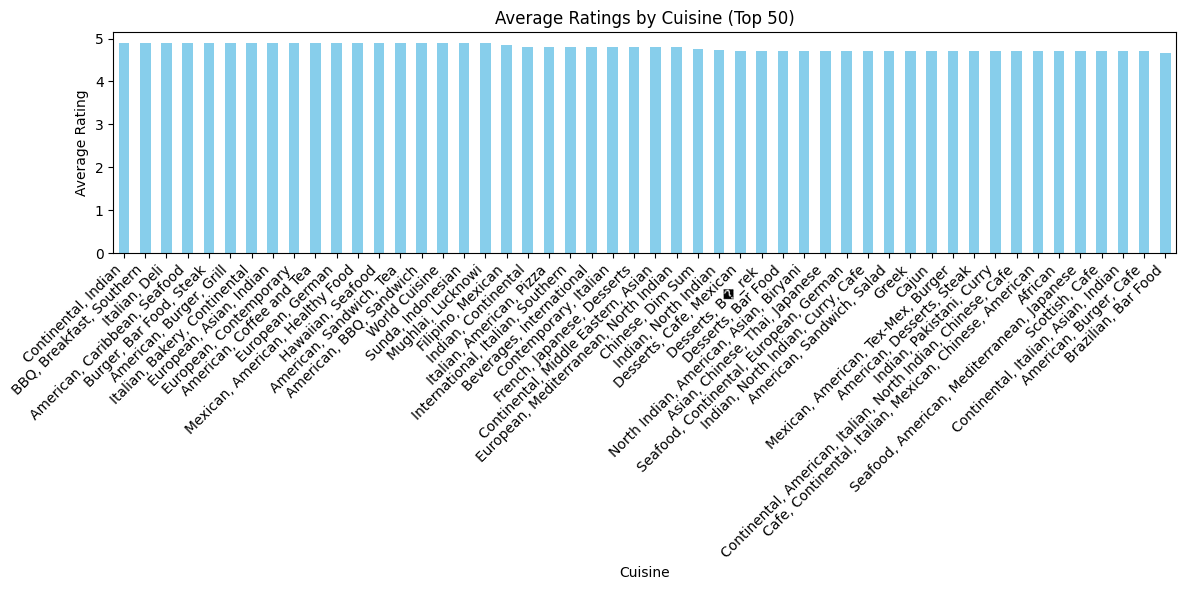

In [103]:
# Group the data by cuisines and calculate the average rating for each cuisine
avg_rating_by_cuisine = df.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(12, 6))
avg_rating_by_cuisine.head(50).plot(kind='bar', color='skyblue')
plt.title('Average Ratings by Cuisine (Top 50)')
plt.xlabel('Cuisine')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

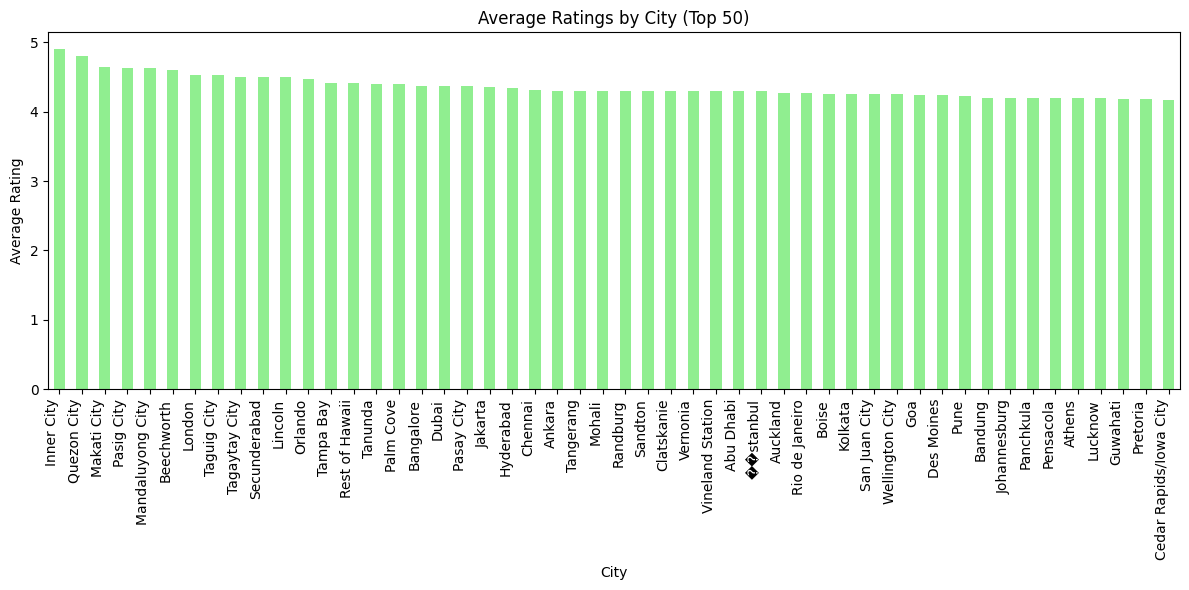

In [127]:
# Group the data by cities and calculate the average rating for each city
avg_rating_by_city = df.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(12, 6))
avg_rating_by_city.head(50).plot(kind='bar', color='lightgreen')
plt.title('Average Ratings by City (Top 50)')
plt.xlabel('City')
plt.ylabel('Average Rating')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

In [109]:
df['Longitude'].value_counts()

Cuisines
North Indian                                             936
North Indian, Chinese                                    511
Chinese                                                  354
Fast Food                                                354
North Indian, Mughlai                                    334
                                                        ... 
Bengali, Fast Food                                         1
North Indian, Rajasthani, Asian                            1
Chinese, Thai, Malaysian, Indonesian                       1
Bakery, Desserts, North Indian, Bengali, South Indian      1
Italian, World Cuisine                                     1
Name: count, Length: 1826, dtype: int64

In [106]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Price range',
       'Aggregate rating', 'Rating color', 'Rating text', 'Votes',
       'Restaurant Name Length', 'Address Length'],
      dtype='object')

### Visualize the relationship between various features and the target variable to gain insights.

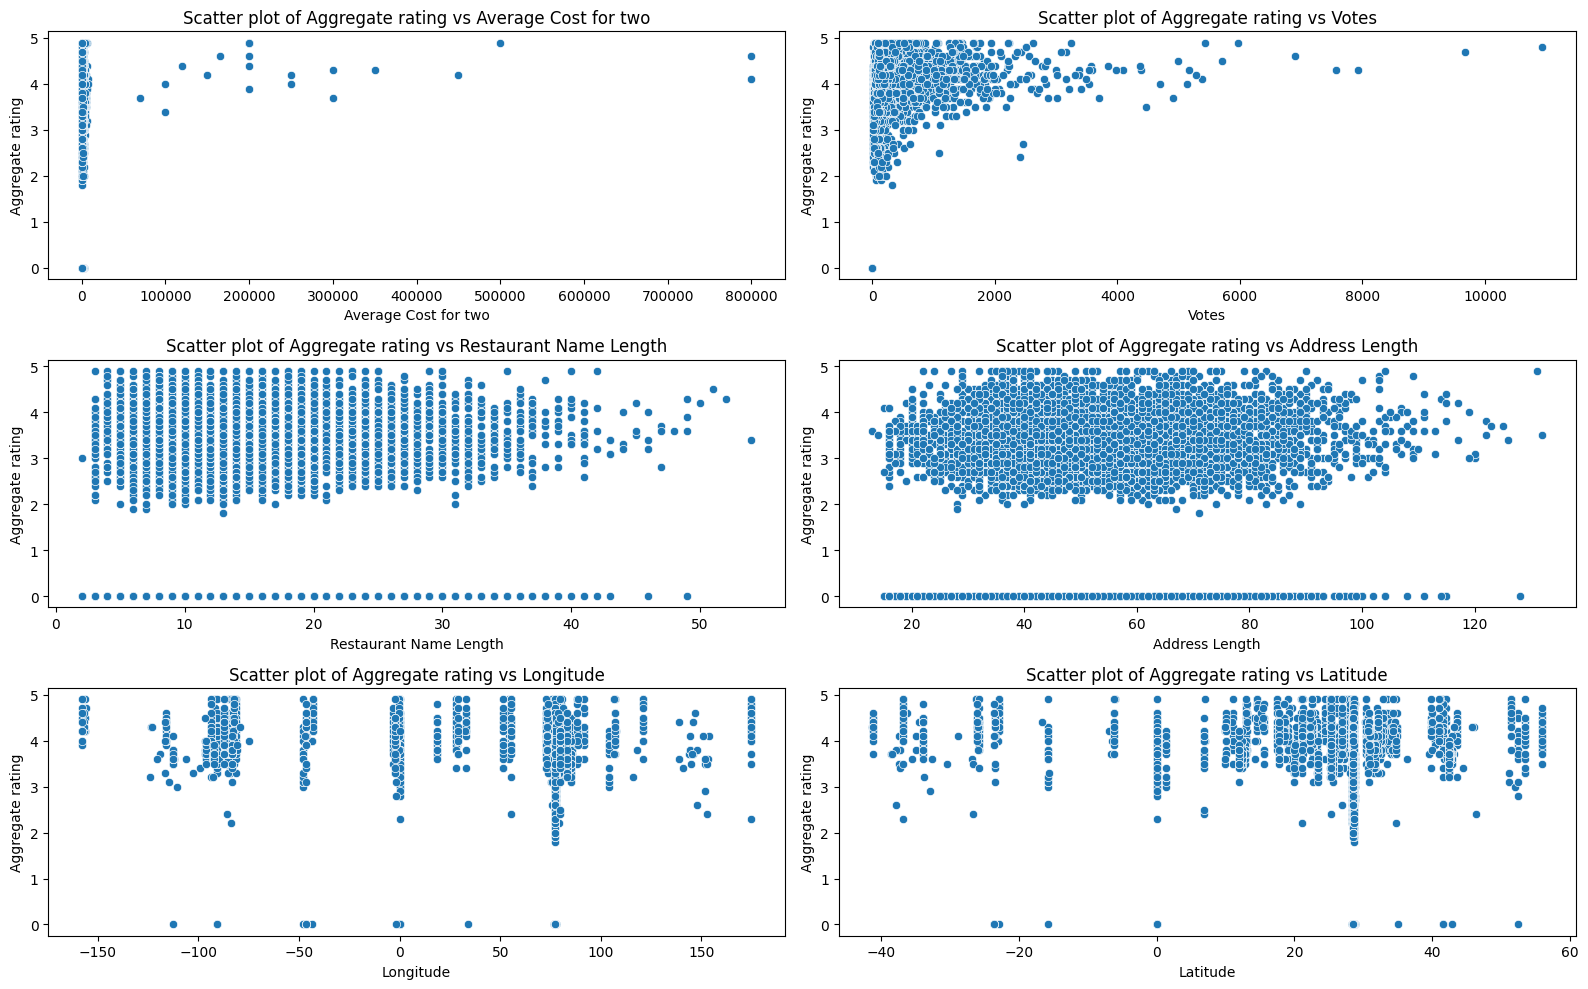

In [116]:
# Scatter plots for numerical features
numerical_features = ['Average Cost for two', 'Votes', 'Restaurant Name Length', 'Address Length','Longitude','Latitude',]

plt.figure(figsize=(16, 10))

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 2, i)
    sns.scatterplot(x=feature, y='Aggregate rating', data=df)
    plt.title(f'Scatter plot of Aggregate rating vs {feature}')

plt.tight_layout()
plt.show()

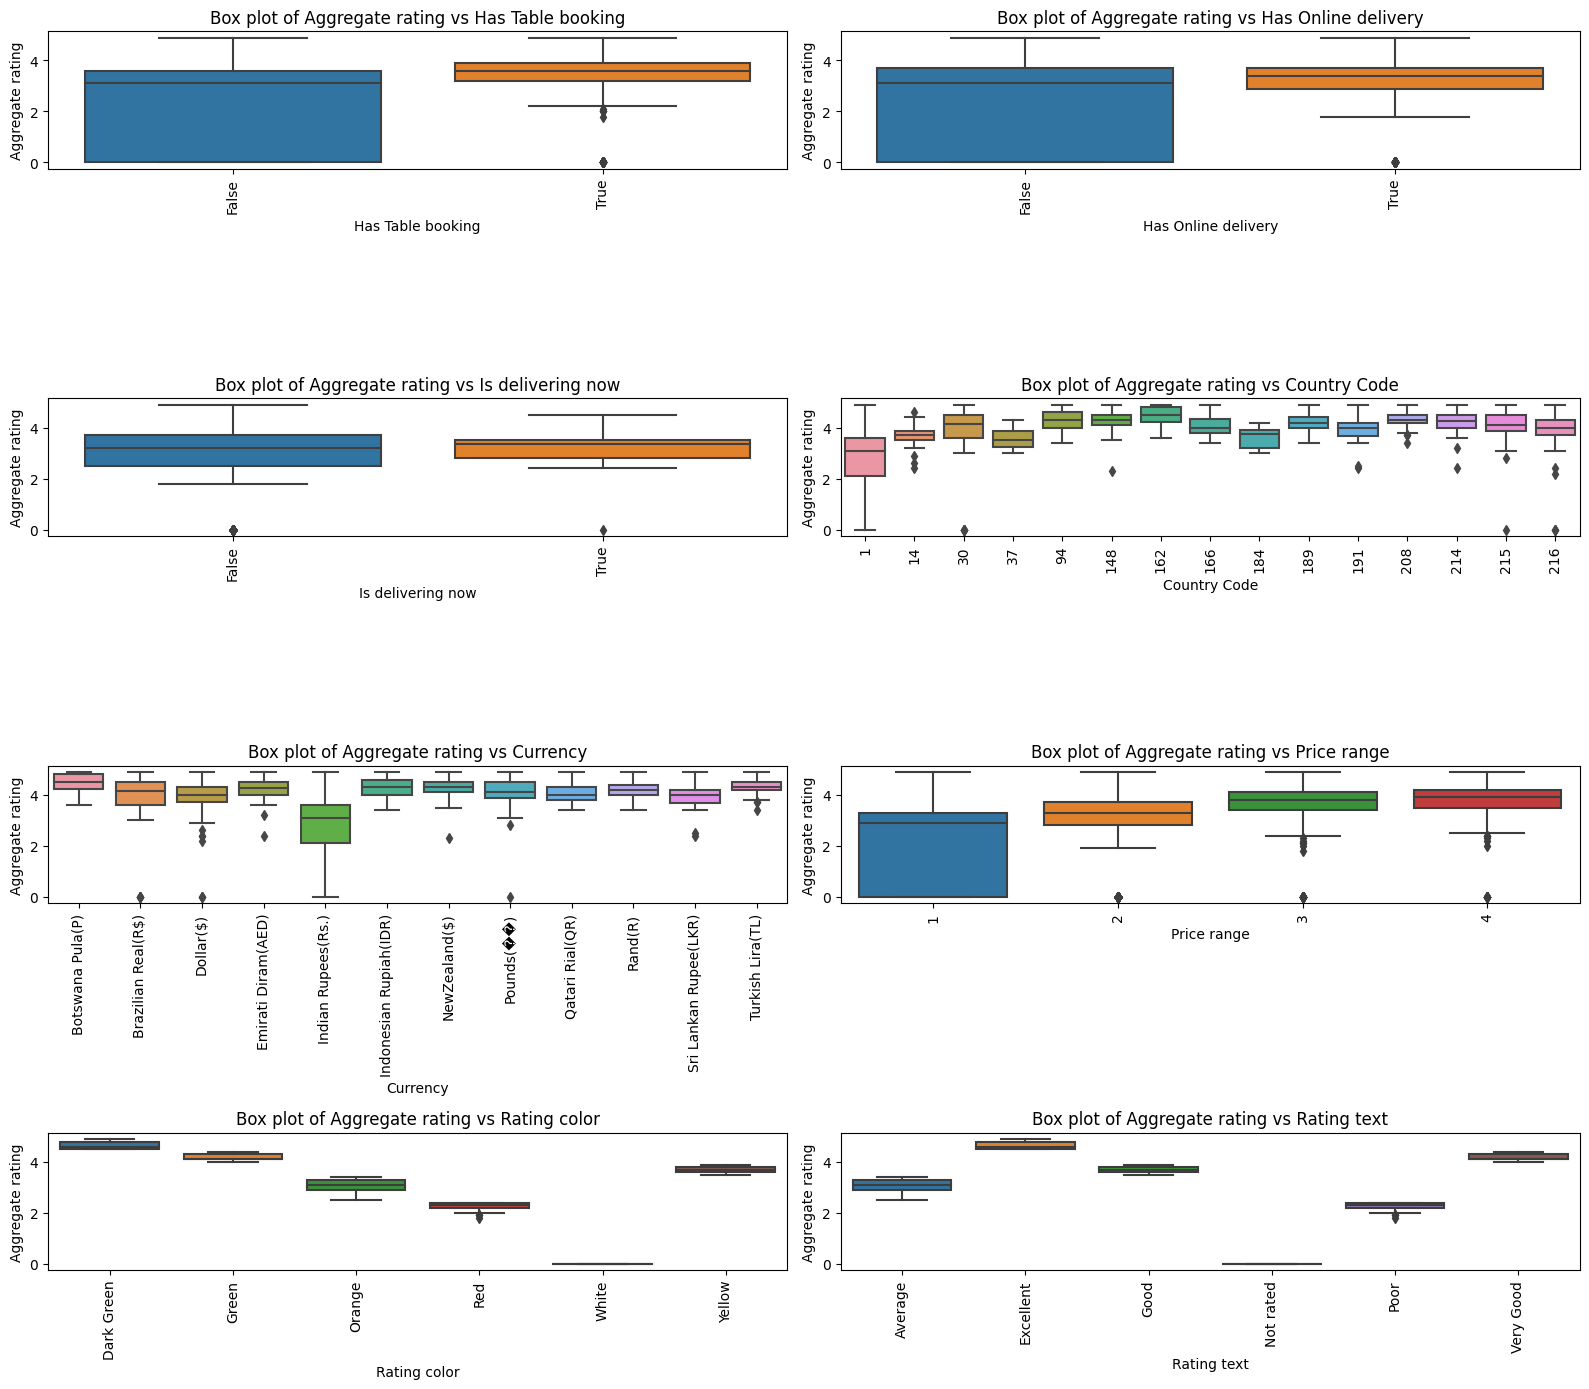

In [124]:
# Box plots for categorical features
categorical_features = ['Has Table booking', 'Has Online delivery', 'Is delivering now', 'Country Code', 'Currency', 'Price range', 'Rating color', 'Rating text']

plt.figure(figsize=(16, 14))

for i, feature in enumerate(categorical_features, 1):
    plt.subplot(4, 2, i)
    ax = sns.boxplot(x=feature, y='Aggregate rating', data=df)
    plt.title(f'Box plot of Aggregate rating vs {feature}')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)  # Rotate x-axis labels

plt.tight_layout()
plt.show()